<a href="https://colab.research.google.com/github/Hassan-zeidan/AAI612_Zeidan_Deep_learning/blob/main/Week%201/Notebook1_1_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AAI612: Deep Learning & its Applications

*Notebook 1.1: Using the perceptron for linear fitting*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week1/Notebook1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 1.1 Nelson


In [61]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

print(tf.__version__)

2.19.0


In [62]:
df = pd.read_csv('/content/nelson.csv')
df.head()

,y,x1,x2
0,55.0,1.50,350
1,51.0,3.00,450
2,60.0,1.75,300
3,75.0,1.00,450
4,55.5,3.10,385


In [63]:
xs1 = df['x1'].values
xs2 = df['x2'].values
ys = df['y'].values

In [64]:
xs1 = xs1.reshape(-1, 1)
xs2 = xs2.reshape(-1, 1)

In [65]:
model1 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model1.compile(optimizer='sgd', loss='mean_squared_error')
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),loss='mean_squared_error')

# Training the Neural Network

In [67]:
from keras.callbacks import History
history1 = History()
history2 = History()

x1 = model1.fit(xs1, ys, epochs=1000, callbacks=[history1], verbose=0)
x2 = model2.fit(xs2 , ys, epochs=1000, callbacks=[history2], verbose=0)

Ok, that we have a model that we have trained to learn the relationship between X and Y, we can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 2, what do you think Y will be? Take a guess before you run this code:

In [68]:
print(history1.history)
print(history2.history)

{'loss': [3197.391845703125, 2559.625244140625, 2100.404052734375, 1769.2200927734375, 1529.857421875, 1356.3480224609375, 1230.071533203125, 1137.6768798828125, 1069.5904541015625, 1018.9473266601562, 980.8257446289062, 951.6959838867188, 929.027099609375, 911.00439453125, 896.3264770507812, 884.0598754882812, 873.5355834960938, 864.2734375, 855.9293823242188, 848.25634765625, 841.0772094726562, 834.264892578125, 827.7279663085938, 821.4009399414062, 815.2368774414062, 809.2018432617188, 803.271484375, 797.42822265625, 791.659423828125, 785.9560546875, 780.31103515625, 774.719970703125, 769.1787719726562, 763.6852416992188, 758.237060546875, 752.8328247070312, 747.4714965820312, 742.1520385742188, 736.8737182617188, 731.6357421875, 726.43798828125, 721.279541015625, 716.1602172851562, 711.0797729492188, 706.03759765625, 701.0335083007812, 696.067138671875, 691.13818359375, 686.2463989257812, 681.3914184570312, 676.5729370117188, 671.7908325195312, 667.0447387695312, 662.334228515625, 

<Axes: >

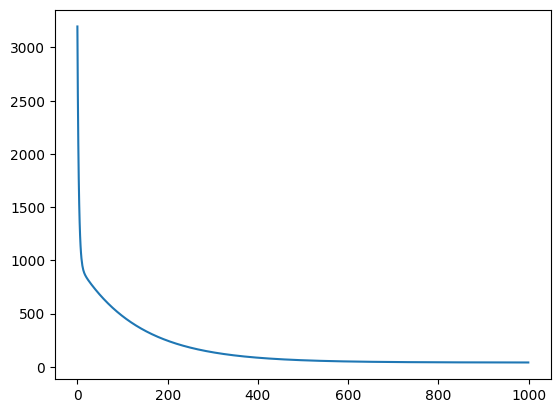

In [70]:
import seaborn as sns
sns.lineplot(data=x1.history['loss'])

<Axes: >

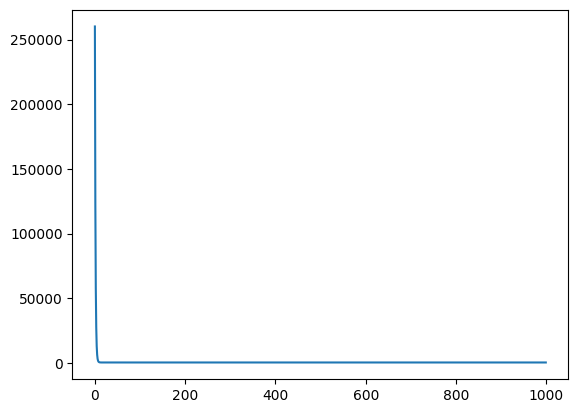

In [71]:
sns.lineplot(data=x2.history['loss'])

In [72]:
pred1 = model1.predict(np.array([[2.0]]))
print(pred1[0][0] * 1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
60623.65


In [73]:
pred2 = model2.predict(np.array([[400]]))
print(pred2[0][0] * 1000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
58811.86


In [74]:
final_pred = (pred1[0][0] + pred2[0][0]) / 2
print(final_pred * 1000)

59717.754


You might have thought 65, right? But it ended up being a little over. Why do you think that is?

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y = 5.12 * x + 14.45, but with only 10 data points we can't know for sure. As a result, the result for 10 is very close to 65, but not necessarily 65.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.
